In [2]:
# Importação seletiva
from pandas import read_csv
from numpy import round

# USUÁRIOS WINDOWS: PRECISAM ALTERAR \ POR / NO DIRETÓRIO
#sa_dir = 'C:/Users/jullya leticia/inep/censo_superior'
sa_dir = 'C:/Users/209-29/inep/censo_superior'

# TABELA CADASTRO DE CURSOS
colunas = ['NU_ANO_CENSO', 'SG_UF', 'CO_UF', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
           'TP_MODALIDADE_ENSINO', 'QT_ING', 'QT_CONC', 'NO_CINE_ROTULO', 
           'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL']

ano = 2020
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV'
d2020 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

ano=2015
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV'
d2015 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

# Q1

In [3]:
# TABELA CADASTRO DE IES
colunas = ['CO_IES', 'NO_REGIAO_IES', 'CO_REGIAO_IES', 'NO_IES', 'SG_IES']

ano = 2020
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_IES_{ano}.CSV'
ies = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)
ies.head()

NO_REGIAO_IES  CO_REGIAO_IES  CO_IES                               NO_IES  \
0  Centro-Oeste              5       1  UNIVERSIDADE FEDERAL DE MATO GROSSO   
1  Centro-Oeste              5       2             UNIVERSIDADE DE BRASÍLIA   
2      Nordeste              2       3      UNIVERSIDADE FEDERAL DE SERGIPE   
3         Norte              1       4     UNIVERSIDADE FEDERAL DO AMAZONAS   
4      Nordeste              2       5        UNIVERSIDADE FEDERAL DO PIAUÍ   

  SG_IES  
0   UFMT  
1    UNB  
2    UFS  
3   UFAM  
4   UFPI

# Q2

In [62]:
d2015.head(5)

# Correção de tipagem
d2015['CO_UF'] = d2015.CO_UF.fillna(0).astype(int)
d2020['CO_UF'] = d2020.CO_UF.fillna(0).astype(int)

In [61]:
print('2015', d2015.info())
print('2020', d2020.info())
print('IES', ies.info())

# Que não houveram problemas de tipagem nos dados de interesse ING e CONC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77897 entries, 0 to 77896
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NU_ANO_CENSO                 77897 non-null  int64  
 1   SG_UF                        76466 non-null  object 
 2   CO_UF                        76466 non-null  float64
 3   TP_CATEGORIA_ADMINISTRATIVA  77897 non-null  int64  
 4   CO_IES                       77897 non-null  int64  
 5   NO_CINE_ROTULO               77897 non-null  object 
 6   CO_CINE_ROTULO               77897 non-null  object 
 7   CO_CINE_AREA_GERAL           77897 non-null  int64  
 8   NO_CINE_AREA_GERAL           77897 non-null  object 
 9   TP_MODALIDADE_ENSINO         77897 non-null  int64  
 10  QT_ING                       77897 non-null  int64  
 11  QT_CONC                      77897 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 7.1+ MB
2015 None
<class 

In [5]:
# d2015.TP_CATEGORIA_ADMINISTRATIVA.value_counts()
d2015 = d2015.query('TP_CATEGORIA_ADMINISTRATIVA==1')
d2020 = d2020.query('TP_CATEGORIA_ADMINISTRATIVA==1')

In [8]:
d2020.query('TP_CATEGORIA_ADMINISTRATIVA==1 | CO_UF==25').CO_IES.value_counts()

5        345
579      279
3        224
582      221
583      207
        ... 
26         1
21095      1
21206      1
23028      1
21416      1
Name: CO_IES, Length: 118, dtype: int64

# Q3

In [65]:
# a) Agrupar os dados
q2020 = (
    d2020.groupby(['CO_IES', 'NO_CINE_ROTULO', 'CO_CINE_ROTULO', 
               'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL'])
    .agg(concluintes = ('QT_CONC', 'sum'))
    .reset_index()
)

q2015 = (
    d2015.rename(columns = {'CO_CINE_ROTULO': 'CO_CURSO'})
    .groupby(['CO_IES', 'CO_CURSO'])
    .agg(ingressantes = ('QT_ING', 'sum'))
    .reset_index()
)

# b) Combinar os dados
df = q2020.merge(q2015, 
                 left_on=['CO_IES', 'CO_CINE_ROTULO'],
                 right_on=['CO_IES', 'CO_CURSO'],
                 how='inner', indicator=True).assign(
                     ano = 2020,
                     evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1),                    
                 )
# df = q2020.merge(q2015, on=['CO_IES', 'CO_CINE_ROTULO'], how='inner', indicator=True)

# Q4

In [66]:
df = df.merge(ies, on='CO_IES', how='inner')
df

CO_IES                                     NO_CINE_ROTULO  \
0          1                                      Administração   
1          1                              Administração pública   
2          1                                          Agronomia   
3          1                                          Alimentos   
4          1                            Arquitetura e urbanismo   
...      ...                                                ...   
4200   18812            Ciências naturais formação de professor   
4201   18812  Programas interdisciplinares abrangendo artes ...   
4202   18812  Programas interdisciplinares abrangendo ciênci...   
4203   18812   Programas interdisciplinares abrangendo educação   
4204   18812  Programas interdisciplinares abrangendo saúde ...   

     CO_CINE_ROTULO  CO_CINE_AREA_GERAL  \
0           0413A01                   4   
1           0413A02                   4   
2           0811A04                   8   
3           0721A01                   7   
4           0731A02                   7   
...             ...                 ...   
4200        0114C02                   1   
4201        0288P01                   2   
4202        0588P01                   5   
4203        0188P01                   1   
4204        0988P01                   9   

                                  NO_CINE_AREA_GERAL  concluintes CO_CURSO  \
0                  Negócios, administração e direito            9  0413A01   
1                  Negócios, administração e direito            0  0413A02   
2     Agricultura, silvicultura, pesca e veterinária           45  0811A04   
3                  Engenharia, produção e construção           10  0721A01   
4                  Engenharia, produção e construção           20  0731A02   
...                                              ...          ...      ...   
4200                                        Educação           11  0114C02   
4201                             Artes e humanidades           45  0288P01   
4202     Ciências naturais, matemática e estatística           34  0588P01   
4203                                        Educação           32  0188P01   
4204                               Saúde e bem-estar          143  0988P01   

      ingressantes _merge   ano  evasao NO_REGIAO_IES  CO_REGIAO_IES  \
0              262   both  2020    96.6  Centro-Oeste              5   
1                0   both  2020     NaN  Centro-Oeste              5   
2              230   both  2020    80.4  Centro-Oeste              5   
3               63   both  2020    84.1  Centro-Oeste              5   
4               61   both  2020    67.2  Centro-Oeste              5   
...            ...    ...   ...     ...           ...            ...   
4200             0   both  2020    -inf      Nordeste              2   
4201           160   both  2020    71.9      Nordeste              2   
4202           180   both  2020    81.1      Nordeste              2   
4203             0   both  2020    -inf      Nordeste              2   
4204           220   both  2020    35.0      Nordeste              2   

                                    NO_IES SG_IES  
0      UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT  
1      UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT  
2      UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT  
3      UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT  
4      UNIVERSIDADE FEDERAL DE MATO GROSSO   UFMT  
...                                    ...    ...  
4200  UNIVERSIDADE FEDERAL DO SUL DA BAHIA   UFSB  
4201  UNIVERSIDADE FEDERAL DO SUL DA BAHIA   UFSB  
4202  UNIVERSIDADE FEDERAL DO SUL DA BAHIA   UFSB  
4203  UNIVERSIDADE FEDERAL DO SUL DA BAHIA   UFSB  
4204  UNIVERSIDADE FEDERAL DO SUL DA BAHIA   UFSB  

[4205 rows x 15 columns]

# Q5

In [67]:
df_ies = (
    df.groupby('SG_IES')
    .agg(regiao = ('NO_REGIAO_IES', 'first'),
         concluintes=('concluintes', 'sum'),
         ingressantes=('ingressantes', 'sum'))
    .assign(evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1))
    .reset_index()
    .sort_values('evasao', ascending=False)
    .assign(rank = lambda x: x.evasao.rank(ascending=False))
    
)

tab1 = df_ies.head(10).filter(items = ['rank', 'SG_IES', 'regiao', 'evasao'])
tab1

rank     SG_IES        regiao  evasao
90   1.0        UFU       Sudeste    91.1
21   2.0       IFMS  Centro-Oeste    89.5
38   3.0      IFSul           Sul    88.0
8    4.0  IF Sertão      Nordeste    85.8
48   5.5       UFBA      Nordeste    85.7
64   5.5       UFMT  Centro-Oeste    85.7
14   7.0       IFBA      Nordeste    84.5
15   8.0   IFBAIANO      Nordeste    83.8
23   9.0      IFNMG       Sudeste    82.0
24  10.0       IFPA         Norte    81.7

# Q6

<AxesSubplot: >

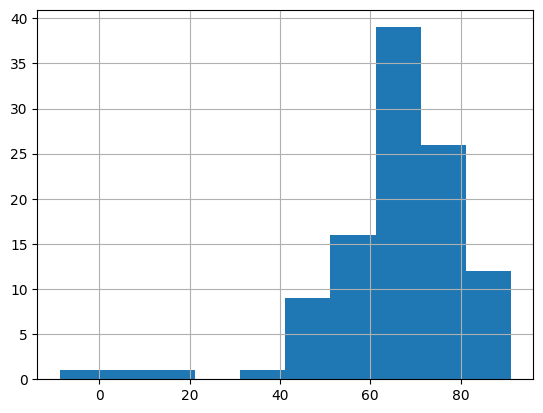

In [68]:
df_ies.evasao.hist()

# Q7

In [74]:
tab2 = (df.sort_values('evasao', ascending=False)
 .merge(ies)
#  .query('SG_IES=="UFPB"')
 .head(10) 
 .filter(items=['SG_IES', 'NO_CINE_ROTULO', 'evasao'])
)
tab2

SG_IES                                  NO_CINE_ROTULO  evasao
0   UFPI                                         Turismo   100.0
1   UFPI                                         Química    92.0
2   UFPI                                        Medicina    90.3
3   UFPI                                  Serviço social    89.5
4   UFPI                                     Odontologia    89.2
5   UFPI                                      Matemática    88.9
6   UFPI           Educação física formação de professor    88.1
7   UFPI  Letras português francês formação de professor    87.2
8   UFPI         Ciências naturais formação de professor    86.1
9   UFPI                                     Estatística    84.8

# Q8

In [70]:
df_area = (
    df.groupby('NO_CINE_AREA_GERAL')
    .agg(curso=('NO_CINE_ROTULO', 'first'),
         concluintes=('concluintes', 'sum'),
         ingressantes=('ingressantes', 'sum'))
    .assign(evasao = lambda x: round((1-(x.concluintes/x.ingressantes))*100,1))
    .reset_index()
    .sort_values('evasao', ascending=False)
    .assign(rank = lambda x: x.evasao.rank(ascending=False))
    
)

tab3 = df_area.head(5).filter(items = ['rank', 'NO_CINE_AREA_GERAL', 'curso', 'evasao'])
tab3

rank                                 NO_CINE_AREA_GERAL  \
8   1.0                                  Programas básicos   
4   2.0  Computação e Tecnologias da Informação e Comun...   
2   3.0        Ciências naturais, matemática e estatística   
0   4.0     Agricultura, silvicultura, pesca e veterinária   
3   5.0         Ciências sociais, comunicação e informação   

                     curso  evasao  
8  ABI Artes e humanidades   100.0  
4    Ciência da computação    76.8  
2                 Biologia    72.4  
0                Agronomia    66.9  
3         Ciências sociais    65.6

# Q9

In [71]:
df_ies.evasao.describe()

count    106.000000
mean      65.866981
std       14.993489
min       -8.700000
25%       60.350000
50%       67.600000
75%       74.625000
max       91.100000
Name: evasao, dtype: float64

# Q10

In [72]:
df_ies.filter(items=['regiao', 'evasao']).groupby('regiao').describe()

evasao                                                         
              count       mean        std   min     25%    50%     75%   max
regiao                                                                      
Centro-Oeste   10.0  71.810000   9.428143  61.4  66.550  68.70  74.875  89.5
Nordeste       28.0  67.814286  14.556625  19.8  61.150  71.45  77.175  85.8
Norte          17.0  64.294118  21.137037  -8.7  62.400  70.40  72.700  81.7
Sudeste        34.0  60.417647  13.617646   6.6  55.625  61.05  66.300  91.1
Sul            17.0  71.635294  10.424367  43.0  67.100  73.30  77.700  88.0

# Q11

In [ ]:
tab1Final = (
    tab1.rename(columns={'rank': 'Posição', 'SG_IES': 'Instituição', 'evasao': 'Taxa de Evasão (%)'})
    .astype({'Posição': int})
)
tab1Final.to_excel('~/Desktop/tab1.xlsx', index=False)
tab1Final.to_latex('~/Desktop/tab1.tex', index=False)

In [75]:
d2015.query('CO_IES==579').groupby(['CO_IES']).agg(media = ('QT_ING', 'mean'),
                                                   max = ('QT_ING', 'max'))

media  max
CO_IES               
579     28.67803  440